## Rough Analysis

A notebook for quick and dirty analysis.

## Setup

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from utils import peval

## Analysis

In [17]:
# read in modelling dataset used in models 1 and 2
df = pd.read_pickle("../../3_preprocessing/data/prepared/pretreatment_1_scaled_partition_1_outlier_flag_1.pkl")
x_cols = df.filter(regex="^\d+", axis=1).columns
descriptive_cols = [col for col in df.columns if col not in x_cols]
df

,partition,train_partition,subsequent_flag_1,sample_order_1,origin,population,date,season,region,cultivar,...,963_savgol_d2,966_savgol_d2,969_savgol_d2,972_savgol_d2,975_savgol_d2,978_savgol_d2,981_savgol_d2,984_savgol_d2,987_savgol_d2,990_savgol_d2
0,train,calibration,0,28262,published,100100,2015-09-27,2015,NT,caly,...,-0.002284,-0.002370,-0.002319,-0.002167,-0.001931,-0.001664,-0.001437,-0.001224,-0.001095,-0.001008
1,train,calibration,0,80895,published,100100,2015-09-27,2015,NT,caly,...,-0.002294,-0.002360,-0.002297,-0.002137,-0.001910,-0.001666,-0.001444,-0.001268,-0.001123,-0.001012
2,train,calibration,0,31015,published,100100,2015-09-27,2015,NT,caly,...,-0.002539,-0.002598,-0.002525,-0.002361,-0.002106,-0.001810,-0.001529,-0.001289,-0.001107,-0.000965
3,train,calibration,0,563,published,100100,2015-09-27,2015,NT,caly,...,-0.002556,-0.002625,-0.002556,-0.002374,-0.002111,-0.001816,-0.001539,-0.001298,-0.001104,-0.000962
4,train,calibration,0,3737,published,100100,2015-09-27,2015,NT,caly,...,-0.002185,-0.002249,-0.002183,-0.002017,-0.001790,-0.001559,-0.001321,-0.001120,-0.000987,-0.000940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85396,holdout,calibration,4,6265,marcelo,200800,NaT,2021,QLD,keitt,...,-0.001942,-0.002023,-0.002006,-0.001882,-0.001695,-0.001485,-0.001276,-0.001108,-0.000975,-0.000870
85397,holdout,calibration,4,54886,marcelo,200800,NaT,2021,QLD,keitt,...,-0.001918,-0.002001,-0.001977,-0.001857,-0.001673,-0.001459,-0.001253,-0.001081,-0.000956,-0.000862
85398,holdout,calibration,4,76820,marcelo,200800,NaT,2021,QLD,keitt,...,-0.001908,-0.002009,-0.001995,-0.001893,-0.001723,-0.001529,-0.001336,-0.001169,-0.001036,-0.000922
85399,holdout,calibration,4,860,marcelo,200800,NaT,2021,QLD,keitt,...,-0.002194,-0.002312,-0.002301,-0.002184,-0.001977,-0.001731,-0.001494,-0.001303,-0.001150,-0.001023


In [18]:
df.groupby(["season", "population", "instrument"])

In [19]:
df.query("season <= 2019").groupby(["season", "partition", "instrument"]).size().reset_index()

,season,partition,instrument,0
0,2015,train,15006,3710
1,2015,train,15014,2217
2,2015,train,15016,2820
3,2015,train,15023,2106
4,2015,train,15026,720
...,...,...,...,...
77,2019,validation,18022,31
78,2019,validation,18029,29
79,2019,validation,18030,158
80,2019,validation,18044,522


In [20]:
df

,partition,train_partition,subsequent_flag_1,sample_order_1,origin,population,date,season,region,cultivar,...,963_savgol_d2,966_savgol_d2,969_savgol_d2,972_savgol_d2,975_savgol_d2,978_savgol_d2,981_savgol_d2,984_savgol_d2,987_savgol_d2,990_savgol_d2
0,train,calibration,0,28262,published,100100,2015-09-27,2015,NT,caly,...,-0.002284,-0.002370,-0.002319,-0.002167,-0.001931,-0.001664,-0.001437,-0.001224,-0.001095,-0.001008
1,train,calibration,0,80895,published,100100,2015-09-27,2015,NT,caly,...,-0.002294,-0.002360,-0.002297,-0.002137,-0.001910,-0.001666,-0.001444,-0.001268,-0.001123,-0.001012
2,train,calibration,0,31015,published,100100,2015-09-27,2015,NT,caly,...,-0.002539,-0.002598,-0.002525,-0.002361,-0.002106,-0.001810,-0.001529,-0.001289,-0.001107,-0.000965
3,train,calibration,0,563,published,100100,2015-09-27,2015,NT,caly,...,-0.002556,-0.002625,-0.002556,-0.002374,-0.002111,-0.001816,-0.001539,-0.001298,-0.001104,-0.000962
4,train,calibration,0,3737,published,100100,2015-09-27,2015,NT,caly,...,-0.002185,-0.002249,-0.002183,-0.002017,-0.001790,-0.001559,-0.001321,-0.001120,-0.000987,-0.000940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85396,holdout,calibration,4,6265,marcelo,200800,NaT,2021,QLD,keitt,...,-0.001942,-0.002023,-0.002006,-0.001882,-0.001695,-0.001485,-0.001276,-0.001108,-0.000975,-0.000870
85397,holdout,calibration,4,54886,marcelo,200800,NaT,2021,QLD,keitt,...,-0.001918,-0.002001,-0.001977,-0.001857,-0.001673,-0.001459,-0.001253,-0.001081,-0.000956,-0.000862
85398,holdout,calibration,4,76820,marcelo,200800,NaT,2021,QLD,keitt,...,-0.001908,-0.002009,-0.001995,-0.001893,-0.001723,-0.001529,-0.001336,-0.001169,-0.001036,-0.000922
85399,holdout,calibration,4,860,marcelo,200800,NaT,2021,QLD,keitt,...,-0.002194,-0.002312,-0.002301,-0.002184,-0.001977,-0.001731,-0.001494,-0.001303,-0.001150,-0.001023


In [21]:
df.query("season <= 2019").groupby(["partition", "instrument"]).size().reset_index().groupby(["partition"]).size()

partition
anderson_external_val     1
train                    21
validation               25
walsh_external_val        1
dtype: int64

In [22]:
df.groupby(["season", "partition", "instrument"]).size().reset_index().groupby(["season", "partition"]).size()

season  partition            
2015    train                     8
2016    train                    16
2017    train                    16
2018    anderson_external_val     1
        validation               23
2019    validation               17
        walsh_external_val        1
2020    holdout                  15
2021    holdout                   4
dtype: int64

In [23]:
sample_counts = df.pivot_table(index=["season", "partition"], columns="instrument", values="spectra_no", aggfunc="count").fillna(0)
columns = sample_counts.columns.tolist()
columns[0], columns[1] = columns[1], columns[0]
sample_counts = sample_counts[columns]
sample_counts

instrument                     15006   14002  15013   15014   15015   15016  \
season partition                                                              
2015   train                  3710.0     0.0    0.0  2217.0     0.0  2820.0   
2016   train                  1284.0  1816.0  208.0  2182.0  1979.0   876.0   
2017   train                  4723.0  1248.0    0.0  1096.0   848.0  3009.0   
2018   anderson_external_val  1448.0     0.0    0.0     0.0     0.0     0.0   
       validation             1704.0   226.0    0.0   628.0   148.0   306.0   
2019   validation              304.0     0.0  320.0   794.0     0.0     0.0   
       walsh_external_val      320.0     0.0    0.0     0.0     0.0     0.0   
2020   holdout                   0.0     0.0  160.0  1143.0     0.0   244.0   
2021   holdout                   0.0    72.0    0.0   152.0     0.0     0.0   

instrument                     15023  15025  15026   15027  ...   17052  \
season partition                                            ...           
2015   train                  2106.0    0.0  720.0  1120.0  ...     0.0   
2016   train                  1551.0    0.0    0.0   220.0  ...     0.0   
2017   train                  1444.0    0.0    0.0   298.0  ...  1712.0   
2018   anderson_external_val     0.0    0.0    0.0     0.0  ...     0.0   
       validation              548.0  240.0    0.0   228.0  ...     0.0   
2019   validation               84.0  320.0   84.0   158.0  ...     0.0   
       walsh_external_val        0.0    0.0    0.0     0.0  ...     0.0   
2020   holdout                   0.0  160.0    0.0    76.0  ...   200.0   
2021   holdout                   0.0    0.0    0.0     0.0  ...     0.0   

instrument                     17057  18007  18022   18029  18030  18044  \
season partition                                                           
2015   train                     0.0    0.0    0.0     0.0    0.0    0.0   
2016   train                     0.0    0.0    0.0     0.0    0.0    0.0   
2017   train                     0.0    0.0    0.0     0.0    0.0    0.0   
2018   anderson_external_val     0.0    0.0    0.0     0.0    0.0    0.0   
       validation             1447.0  489.0  220.0  1046.0  464.0  108.0   
2019   validation              196.0  512.0   31.0    29.0  158.0  522.0   
       walsh_external_val        0.0    0.0    0.0     0.0    0.0    0.0   
2020   holdout                   0.0  696.0    0.0     0.0   76.0  276.0   
2021   holdout                   0.0  230.0    0.0     0.0    0.0    0.0   

instrument                    20013  30000   30004  
season partition                                    
2015   train                    0.0    0.0     0.0  
2016   train                    0.0  288.0  1357.0  
2017   train                    0.0    0.0  1344.0  
2018   anderson_external_val    0.0    0.0     0.0  
       validation               0.0    0.0    80.0  
2019   validation               0.0    0.0     0.0  
       walsh_external_val       0.0    0.0     0.0  
2020   holdout                  0.0    0.0     0.0  
2021   holdout                100.0    0.0     0.0  

[9 rows x 31 columns]

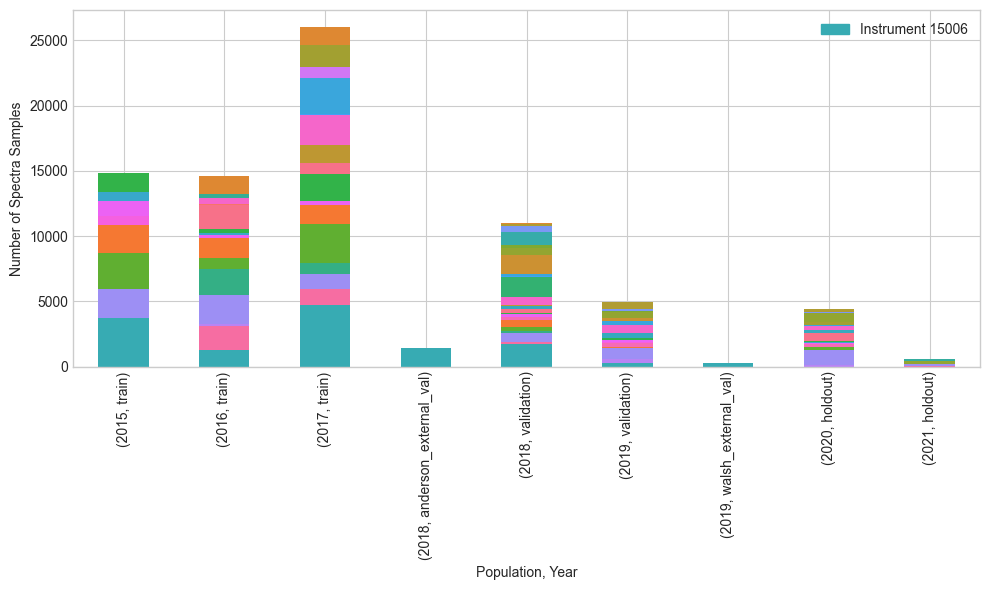

In [24]:
fig, ax = plt.subplots(figsize=(10, 6))

palette = sns.color_palette("husl", len(sample_counts.columns))
np.random.seed(5)
np.random.shuffle(palette)

sample_counts.plot(kind='bar', stacked=True, color=palette, ax=ax, legend=False, )

ax.set_xlabel('Population, Year')
ax.set_ylabel('Number of Spectra Samples')

from matplotlib.patches import Patch
legend_label = "Instrument 15006"
legend_patch = Patch(color=palette[0], label=legend_label)
ax.legend(handles=[legend_patch])


plt.style.use('seaborn-v0_8-whitegrid')
plt.tight_layout()
plt.show()

In [25]:
look = df.query("instrument == 15006 and season == 2019")
look.groupby("population").size()

population
112800    160
112900    160
200300    304
dtype: int64

In [26]:
train_instruments = (
    df.query("partition == 'train'")
    .groupby(["instrument"])
    .size()
    .reset_index()
)["instrument"].to_list()
train_instruments

[14002,
 15006,
 15013,
 15014,
 15015,
 15016,
 15023,
 15026,
 15027,
 15028,
 15029,
 15038,
 16033,
 16034,
 16041,
 17025,
 17033,
 17040,
 17052,
 30000,
 30004]

In [27]:
all_metrics = []
test_sets = {
    "anderson_external_val": "partition == 'anderson_external_val'",
    # "walsh_external_val": "partition == 'walsh_external_val'",
    "season_2018": "season == 2018",
    "season_2019": "season == 2019",
}

In [36]:
# pls
model_1 = pd.read_pickle("data/predictions/model_1.pkl")
for test_set, query in test_sets.items():
    test_partition = model_1.query(query) 
    metrics = peval.calculate_metrics(y_true=test_partition["y_true"], y_pred=test_partition["y_pred"], plot=False)
    metrics["model"] = "PLS"
    metrics["test_set"] = test_set
    all_metrics.append(metrics)

# ann
model_2 = pd.read_pickle("data/predictions/model_2.pkl")
for test_set, query in test_sets.items():
    test_partition = model_2.query(query) 
    metrics = peval.calculate_metrics(y_true=test_partition["y_true"], y_pred=test_partition["y_pred"], plot=False)
    metrics["model"] = "PLS"
    metrics["test_set"] = test_set
    all_metrics.append(metrics)
    
# cnn
model_3 = pd.read_pickle("data/predictions/model_3.pkl")
for test_set, query in test_sets.items():
    test_partition = model_2.query(query) 
    metrics = peval.calculate_metrics(y_true=test_partition["y_true"], y_pred=test_partition["y_pred"], plot=False)
    metrics["model"] = "PLS"
    metrics["test_set"] = test_set
    all_metrics.append(metrics)
    
pd.DataFrame(all_metrics)

,n,r2,rmse,sep,bias,rpd,model,test_set
0,1448,0.807127,1.171973,1.121546,0.341356,2.380210,PLS,anderson_external_val
1,12432,0.683297,1.439793,1.417386,0.253346,1.805109,PLS,season_2018
2,5265,0.243523,2.151072,2.001051,0.789725,1.236061,PLS,season_2019
3,1448,0.824868,1.116774,1.013122,0.470613,2.634940,PLS,anderson_external_val
4,12432,0.818843,1.088933,1.038912,0.326378,2.462705,PLS,season_2018
5,5265,0.551563,1.656181,1.460398,0.781394,1.693663,PLS,season_2019
6,1448,0.824868,1.116774,1.013122,0.470613,2.634940,PLS,anderson_external_val
7,12432,0.818843,1.088933,1.038912,0.326378,2.462705,PLS,season_2018
8,5265,0.551563,1.656181,1.460398,0.781394,1.693663,PLS,season_2019
9,1368,0.806068,1.180773,1.137487,0.318269,2.358054,PLS,anderson_external_val


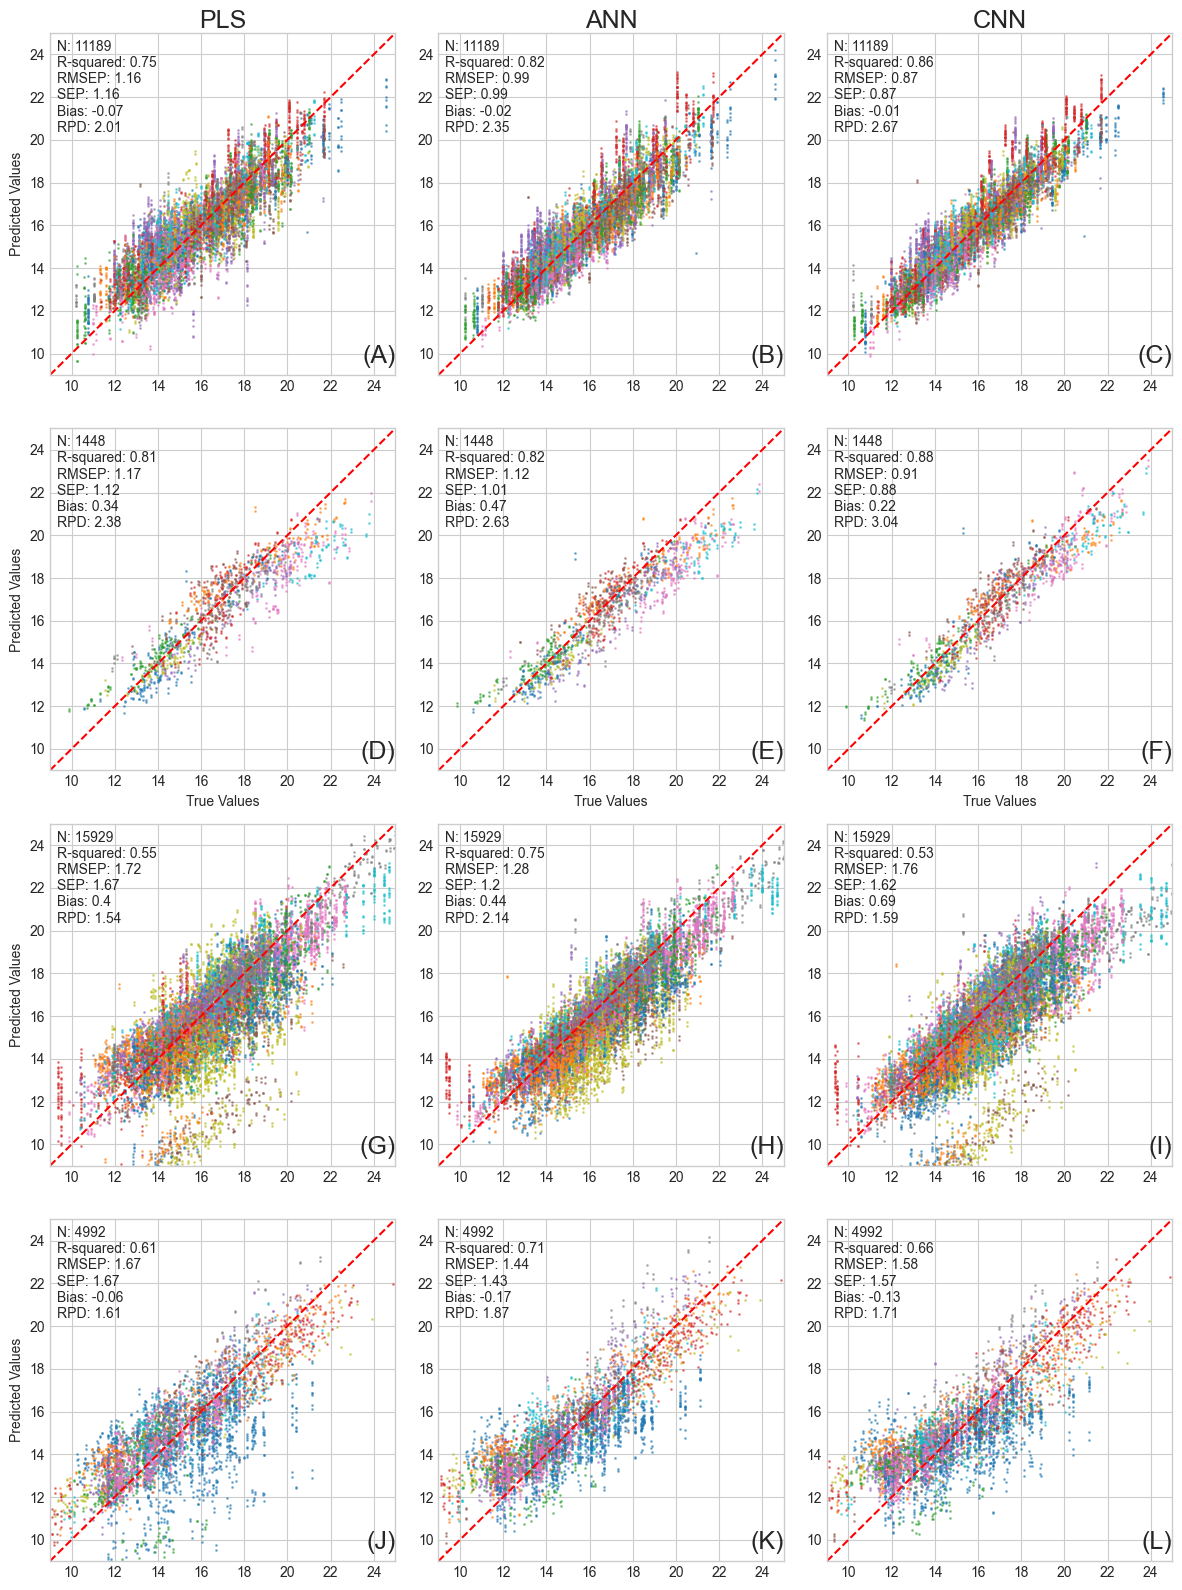

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Define your queries
queries = [
    # "partition == 'train' and train_partition == 'calibration'",
    "partition == 'train' and train_partition == 'tunning'",
    "partition == 'anderson_external_val'",
    # "partition == 'walsh_external_val'",
    # f"season == 2018 and instrument in {train_instruments}"
    # , f"season == 2019 and instrument in {train_instruments}"
    # f"season == 2018 and instrument not in {train_instruments}"
    # , f"season == 2019 and instrument not in {train_instruments}"
    "partition == 'validation'",
    # f"season == 2019",
    "partition == 'holdout'",
]

# Global min and max for axis scaling
global_min, global_max = 9, 25

# Create a figure with subplots - 4 rows (one for each query) and 3 columns (one for each model)
fig, axes = plt.subplots(len(queries), 3, figsize=(12, 4*len(queries)))

for i, query in enumerate(queries):
    # Load data for each query
    models = {
        "PLS": model_1.query(query),
        "ANN": model_2.query(query),
        "CNN": model_3.query(query)  # Adjust as necessary
    }
    
    # Calculate metrics for each model
    metrics = {}
    for model_name, data in models.items():
        metrics[model_name] = peval.calculate_metrics(y_true=data["y_true"], y_pred=data["y_pred"], plot=False)
        
    # Prepare stats text for each model
    stats = {}
    for model_name, metric in metrics.items():
        stats[model_name] = f"N: {metric['n']}\nR-squared: {round(metric['r2'], 2)}\nRMSEP: {round(metric['rmse'], 2)}\nSEP: {round(metric['sep'], 2)}\nBias: {round(metric['bias'], 2)}\nRPD: {round(metric['rpd'], 2)}"
    
    # Plotting
    for j, (model_name, data) in enumerate(models.items()):
        ax = axes[i, j] if len(queries) > 1 else axes[j]  # Handle indexing for axes
        
        # Generate color mapping for populations
        unique_populations = data["population"].unique()
        for population in unique_populations:
            data_p = data[data["population"] == population]
            ax.scatter(data_p["y_true"], data_p["y_pred"], s=1, alpha=0.5)
        ax.plot([global_min, global_max], [global_min, global_max], linestyle='--', color='red')
        
        if j in [0]: 
            ax.set_ylabel("Predicted Values")
        
        # Only set xlabel for the bottom subplot
        if i in [1]: 
            ax.set_xlabel("True Values")
            
        if i in [0]: 
            ax.set_title(model_name, fontsize=18, pad=-2)
        
        ax.text(0.02, 0.98, stats[model_name], transform=ax.transAxes, fontsize=10, ha='left', va='top')
        # Change titles to (A), (B), (C), ... for each row
        title_label = chr(65 + i*3 + j)  # ASCII code for A is 65
        ax.text(1.0, 0.02, f"({title_label})", transform=ax.transAxes, fontsize=18, ha='right', va='bottom') 
        
        ax.set_xlim(global_min, global_max)
        ax.set_ylim(global_min, global_max)

plt.tight_layout()
plt.show()
